# BOSTON COMPETITIONのサブミットファイルを作る

## まず予測モデルを作る

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("./train.csv",index_col=0)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,,,,,,,,,,,,,,
328,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5,287.0,19.6,12.79,22.2,396.90
458,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666.0,20.2,16.94,13.5,3.50
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,5.21,28.7,394.12
329,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4,430.0,16.9,9.97,19.3,382.44
61,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284.0,19.7,13.15,18.7,395.11


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,230.000000,250.000000
mean,1.209792,13.056000,9.059040,0.105112,0.955923,13.397716,59.882927,5.657884,60.30800,345.012000,38.526560,11.399640,23.723913,343.302160
std,2.363649,22.515761,6.914615,0.277001,1.439184,24.057131,31.834176,5.774066,179.10957,170.971941,81.300054,5.985838,8.500983,116.777081
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.202400,1.00000,20.200000,2.600000,1.920000,11.000000,0.320000
25%,0.051378,0.000000,3.675000,0.000000,0.448000,5.925000,33.575000,2.421700,4.00000,264.000000,17.400000,6.875000,18.700000,376.247500
50%,0.140775,0.000000,6.910000,0.000000,0.520000,6.313500,65.200000,3.866050,5.00000,307.000000,18.900000,10.280000,21.750000,391.305000
75%,0.657123,20.000000,17.335000,0.000000,0.624000,6.857250,88.500000,6.219600,8.00000,403.000000,20.200000,14.767500,27.400000,395.630000
max,9.966540,100.000000,27.740000,1.000000,6.833000,100.000000,100.000000,24.000000,666.00000,711.000000,396.900000,30.810000,50.000000,396.900000


In [40]:
df.isnull().sum()
#データをよく見て、よい予測ができるようにがんばって

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [11]:
y=df["MEDV"].values
x=df.iloc[:,0:12].values

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=0)

model=LinearRegression()
model.fit(x_train,y_train) #学習用データで学習

print("train:",model.score(x_train,y_train)) #学習用データでのスコア
print("test:",model.score(x_test,y_test)) #検証用データでのスコア


train: 0.7826253845901174
test: 0.5752835559227335


## ここからは、test.csvに対しての予測を作る

In [29]:
test=pd.read_csv("./test.csv",index_col=0)#読み込む

In [16]:
xx=test.iloc[:,:12].values

In [17]:
yy=model.predict(xx) #上で作ったmodelでxxについての予測をyyとして作る
# できた

## ここからはサブミッション用のファイルづくり。ここから後はこのままでもいい

In [36]:
sub = pd.DataFrame(yy,columns=["MEDV"],index=test.index)
#test.csvのIDとMEDVのcolumns名を持った新しいデータフレームをyyで作る

In [38]:
sub.head()#確認

,MEDV
ID,
64,383.444717
203,384.015807
129,376.846933
185,399.894073
141,360.163125


In [27]:
sub.to_csv("submission_test.csv") #submission_test.csvとして、保存
#このファイルをサブミットできます

# やってみよう!!

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("./train.csv", index_col = 0)

In [70]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,,,,,,,,,,,,,,
328,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5,287.0,19.6,12.79,22.2,396.90
458,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666.0,20.2,16.94,13.5,3.50
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,5.21,28.7,394.12
329,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4,430.0,16.9,9.97,19.3,382.44
61,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8,284.0,19.7,13.15,18.7,395.11


In [71]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,230.000000,250.000000
mean,1.209792,13.056000,9.059040,0.105112,0.955923,13.397716,59.882927,5.657884,60.30800,345.012000,38.526560,11.399640,23.723913,343.302160
std,2.363649,22.515761,6.914615,0.277001,1.439184,24.057131,31.834176,5.774066,179.10957,170.971941,81.300054,5.985838,8.500983,116.777081
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.202400,1.00000,20.200000,2.600000,1.920000,11.000000,0.320000
25%,0.051378,0.000000,3.675000,0.000000,0.448000,5.925000,33.575000,2.421700,4.00000,264.000000,17.400000,6.875000,18.700000,376.247500
50%,0.140775,0.000000,6.910000,0.000000,0.520000,6.313500,65.200000,3.866050,5.00000,307.000000,18.900000,10.280000,21.750000,391.305000
75%,0.657123,20.000000,17.335000,0.000000,0.624000,6.857250,88.500000,6.219600,8.00000,403.000000,20.200000,14.767500,27.400000,395.630000
max,9.966540,100.000000,27.740000,1.000000,6.833000,100.000000,100.000000,24.000000,666.00000,711.000000,396.900000,30.810000,50.000000,396.900000


In [72]:
crim = df.iloc[:,0].values
medv = df["MEDV"].values

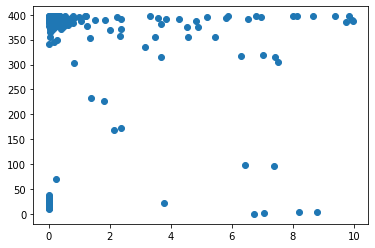

In [73]:
plt.scatter(crim, medv)

In [74]:
col = df.columns.values

In [75]:
col

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [76]:
data = df.iloc[:,:13].values

In [77]:
print(data)

[[ 0.24103  0.       7.38    ... 19.6     12.79    22.2    ]
 [ 8.20058  0.      18.1     ... 20.2     16.94    13.5    ]
 [ 0.02985  0.       2.18    ... 18.7      5.21    28.7    ]
 ...
 [ 0.14052  0.      10.59    ... 18.6      9.38    28.1    ]
 [ 0.19657 22.       5.86    ... 19.1     10.15    20.5    ]
 [ 0.03427  0.       5.19    ... 20.2      9.8     19.5    ]]


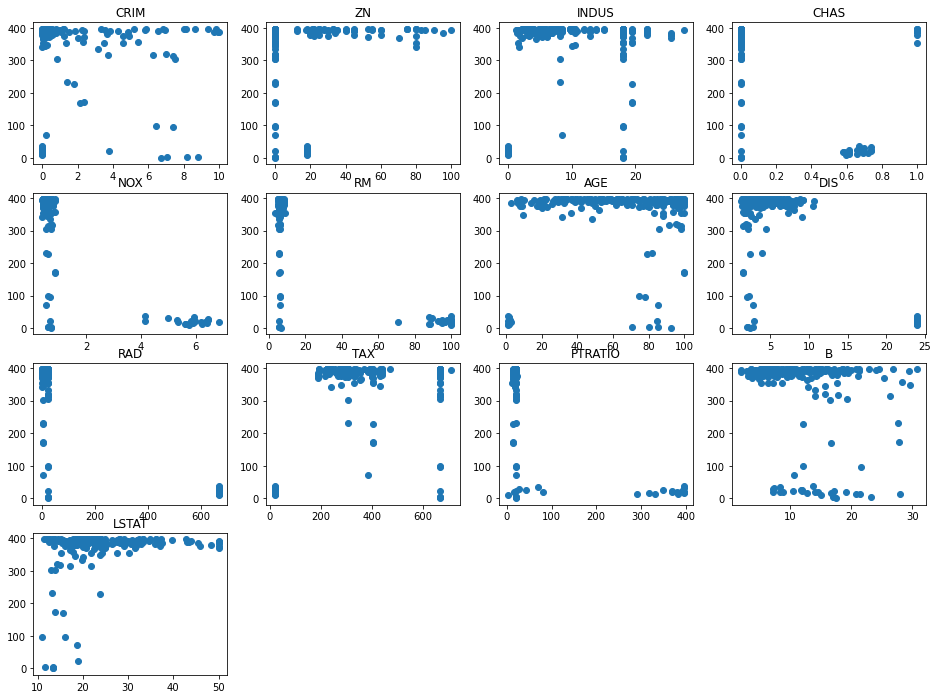

In [78]:
plt.figure(figsize = (16,12))
for i in range (13):
    plt.subplot(4,4,i+1)
    plt.scatter(data[:,i],medv)
    plt.title(col[i])

In [79]:
#関係ありそう→CRIM, INDUS, NOX, RM, DIS, RAD, PTRATIO, B, LSTAT
#関係なさそう→ZN, CHAS, AGE, TAX

In [80]:
df.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [126]:
df["LSTAT"] = df["LSTAT"].fillna(df["LSTAT"].mean())

In [127]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.209792,13.056000,9.059040,0.105112,0.955923,13.397716,59.882927,5.657884,60.30800,345.012000,38.526560,11.399640,23.723913,343.302160
std,2.363649,22.515761,6.914615,0.277001,1.439184,24.057131,31.834176,5.774066,179.10957,170.971941,81.300054,5.985838,8.152433,116.777081
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.202400,1.00000,20.200000,2.600000,1.920000,11.000000,0.320000
25%,0.051378,0.000000,3.675000,0.000000,0.448000,5.925000,33.575000,2.421700,4.00000,264.000000,17.400000,6.875000,18.900000,376.247500
50%,0.140775,0.000000,6.910000,0.000000,0.520000,6.313500,65.200000,3.866050,5.00000,307.000000,18.900000,10.280000,22.200000,391.305000
75%,0.657123,20.000000,17.335000,0.000000,0.624000,6.857250,88.500000,6.219600,8.00000,403.000000,20.200000,14.767500,26.475000,395.630000
max,9.966540,100.000000,27.740000,1.000000,6.833000,100.000000,100.000000,24.000000,666.00000,711.000000,396.900000,30.810000,50.000000,396.900000


In [198]:
y = df["MEDV"].values
x = df.iloc[:,[0,4,5,7]].values

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

model = LinearRegression()
model.fit(x_train, y_train)

print("train:",model.score(x_train,y_train))
print("test:",model.score(x_test, y_test))

train: 0.7678334448290418
test: 0.5689171490215714


In [200]:
#model_2: KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

model_2 = KNeighborsRegressor(2)
model_2.fit(x_train, y_train)

print("train 2:",model_2.score(x_train,y_train))
print("test 2:",model_2.score(x_test, y_test))

train 2: 0.8833434055952998
test 2: 0.5773583210580144


In [201]:
#model_3: Lasso

from sklearn.linear_model import Lasso

model_3 = Lasso()
model_3.fit(x_train, y_train)

print("train 3:",model_3.score(x_train,y_train))
print("test 3:",model_3.score(x_test, y_test))

train 3: 0.7668039565327736
test 3: 0.5678016805182604


In [193]:
#model_4: SVR

from sklearn.svm import SVR

X = x_train/np.max(x_train, axis = 0)
Y = y_train/np.max(y_train)
Xtest = x_test/np.max(x_train, axis = 0)
Ytest = y_test/np.max(y_train)

model_4 = SVR(kernel = 'rbf', C = 100, gamma = 0.1)
model_4.fit(X, Y)

print("train 4:",model_4.score(X, Y))
print("test 4:",model_4.score(Xtest, Ytest))

train 4: 0.7060730102920797
test 4: 0.4999644805432625


In [151]:
test = pd.read_csv("./test.csv", index_col = 0)

In [152]:
test.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      34
dtype: int64

In [153]:
test["LSTAT"] = test["LSTAT"].fillna(np.mean(test["LSTAT"]))

In [154]:
test.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [155]:
xx = test.iloc[:,[0,2,4,5,7,8,10,11,12]].values

In [156]:
yy = model_2.predict(xx)

In [157]:
sub = pd.DataFrame(yy, columns = ["MEDV"], index = test.index)

In [158]:
sub.head()

,MEDV
ID,
64,381.200
203,382.190
129,396.900
185,394.365
141,381.175


In [159]:
sub.to_csv("submission_test.csv")